비지도- k평균 클러스터링


In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  random_state=10)

In [2]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [8]:
X

array([[ -5.57785425,   5.87298826],
       [  1.62783216,   4.17806883],
       [ -6.95088443,  -9.02459449],
       [ -0.95276902,  -5.03431566],
       [  6.55010412,  -7.9123388 ],
       [ -6.67870531,   5.52444477],
       [ -5.52802829,   5.62491189],
       [ -8.03866378,  -8.91215049],
       [  5.55912116, -10.06110303],
       [ -7.26457869,   4.98882111],
       [ -5.61092213,  -8.52762972],
       [ -4.69881639,   5.23992395],
       [  6.68288513, -10.31693051],
       [  0.6769707 ,  -6.29133602],
       [  5.69192445,  -9.47641249],
       [ -6.08678403,   4.7298269 ],
       [  3.51518944,   5.17965845],
       [ -0.09177178,  -6.25796005],
       [  6.91094987, -10.6647659 ],
       [ -7.16184674,   4.8218863 ],
       [ -6.32637212,   3.85130367],
       [  1.20634557,  -3.03874201],
       [  2.44078244,   4.47434875],
       [ -7.64253624,  -8.07280455],
       [ -5.66098962,   6.82502222],
       [ -5.0162266 ,   5.37742451],
       [  0.26308097,  -5.97487434],
 

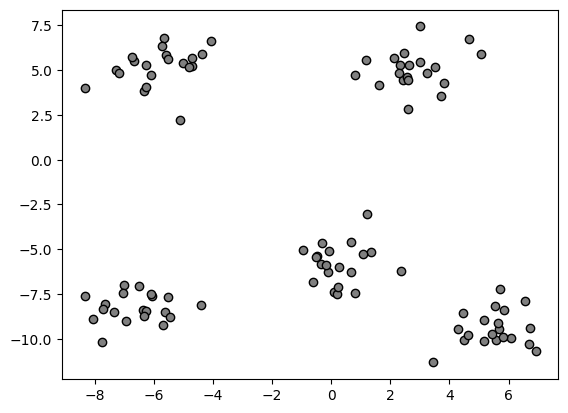

In [3]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],
            c='gray',
            edgecolors='black',
            marker='o')
plt.show()

In [4]:
# k-means clustering
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5,
             init='random',
             n_init=10,
             max_iter=100,
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_
print(label_kmc)

[1 4 3 0 2 1 1 3 2 1 3 1 2 0 2 1 4 0 2 1 1 0 4 3 1 1 0 2 3 4 0 0 2 0 1 2 3
 0 3 4 0 0 0 2 3 3 1 2 4 2 4 2 1 3 2 2 0 4 0 3 2 4 4 0 1 4 2 4 2 3 3 1 4 2
 0 0 3 4 1 1 2 2 4 0 4 3 0 3 0 3 4 3 1 4 4 4 3 1 1 3]


In [5]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head()

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,1
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,0
4,6.550104,-7.912339,0,2


In [6]:
# 타겟 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


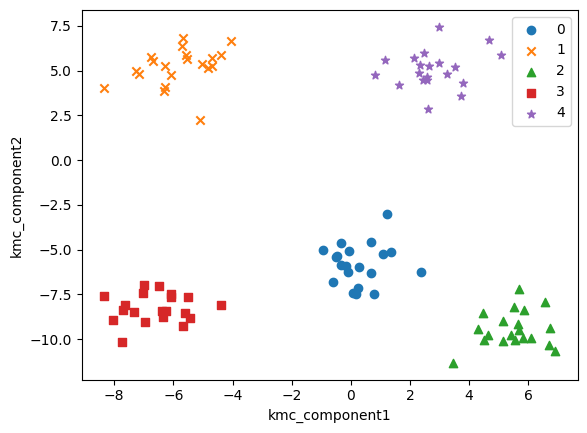

In [9]:
# k-means clustering 이용한 데이터 플랏
df = X_kmc_df
markers = ['o','x','^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [11]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


DBSCAN

In [12]:
# 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300,
                  noise=0.05,
                  random_state=0)


In [13]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [19]:
X

array([[ 0.71541261, -0.49408918],
       [ 0.24678948, -0.24009066],
       [ 0.94326068,  0.3467999 ],
       [ 0.9737422 , -0.49290076],
       [ 1.2397133 , -0.4114107 ],
       [-1.01268032,  0.19344083],
       [ 1.17510658, -0.47743648],
       [ 0.66579578, -0.40894853],
       [ 0.49964772,  0.85701497],
       [-0.70075928,  0.79482792],
       [ 1.94187893,  0.27689868],
       [ 0.92762623,  0.31189552],
       [ 0.22843668, -0.22577849],
       [ 1.44327842, -0.49090786],
       [ 0.92559406,  0.36730006],
       [-0.04467711,  1.00255268],
       [ 1.78183782,  0.00309463],
       [-0.38566633,  0.96042378],
       [ 1.09277388, -0.55390691],
       [ 0.06941497,  0.20050755],
       [ 0.37364784, -0.20572006],
       [-0.45723039,  0.8916486 ],
       [-0.88272211,  0.49107124],
       [-0.85741542,  0.44206644],
       [ 0.9793197 , -0.57945888],
       [-0.76876452,  0.60408967],
       [ 0.41433502, -0.3051615 ],
       [ 2.0081785 ,  0.24518153],
       [ 1.23828257,

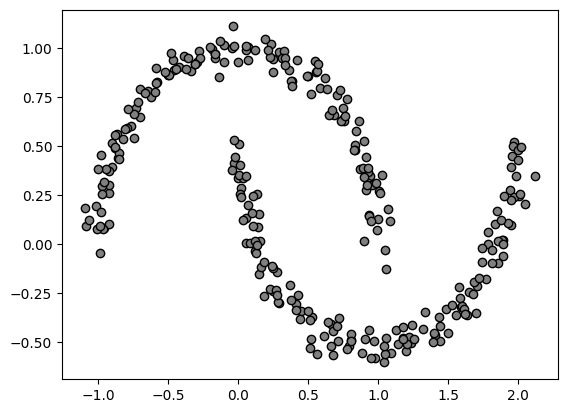

In [14]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],
            c='gray',
            edgecolors='black',
            marker='o')
plt.show()

In [37]:
# DB scan
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)   # 0.2 반경 안으로 들어오면 같은 그룹
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [38]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head()

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [39]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


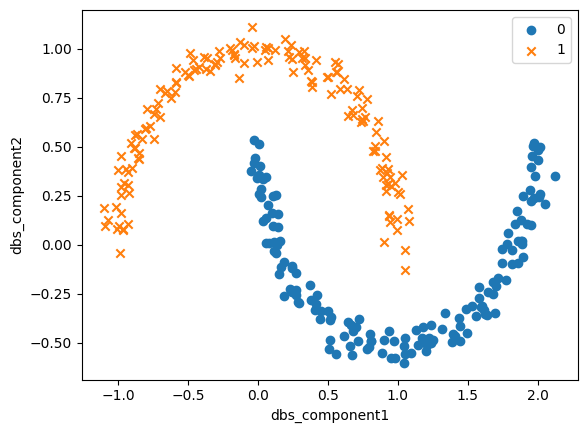

In [40]:
# DBcan을 이용한 데이터 플랏
df = X_dbs_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, 
                marker=mark,
                label=target_i)
    
plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [41]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504


가우시안 혼합 모형

In [43]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=2,
                  random_state=2)

In [44]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(200, 2)
(200,)


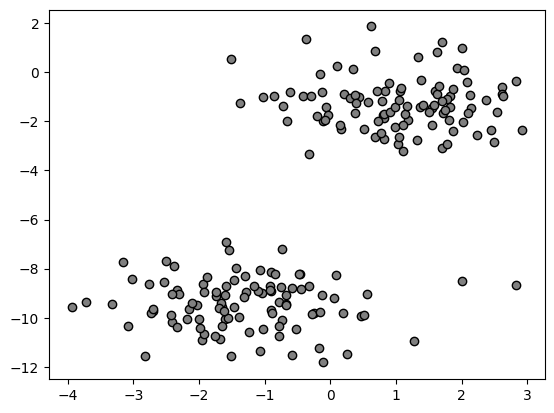

In [45]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],
            c='gray',
            edgecolors='black',
            marker='o')
plt.show()

In [46]:
# 가우시안 혼합 모형
from sklearn.mixture import GaussianMixture
gmn = GaussianMixture(n_components=2,
                      random_state=0)

# 피처가 2개 이상이면 시각화 힘들어요
gmn.fit(X)
label_gmn = gmn.predict(X)
print(label_gmn)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


In [47]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
gmn_columns = ['gmn_comp1', 'gmn_comp2']
X_gmn_df = pd.DataFrame(X, columns=gmn_columns)
X_gmn_df['target'] = y
X_gmn_df['label_gmn'] = label_gmn
X_gmn_df.head()

,gmn_comp1,gmn_comp2,target,label_gmn
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


In [48]:
# 타겟 클래스 종류 확인
print(set(X_gmn_df['target']))
print(set(X_gmn_df['label_gmn']))

{0, 1}
{0, 1}


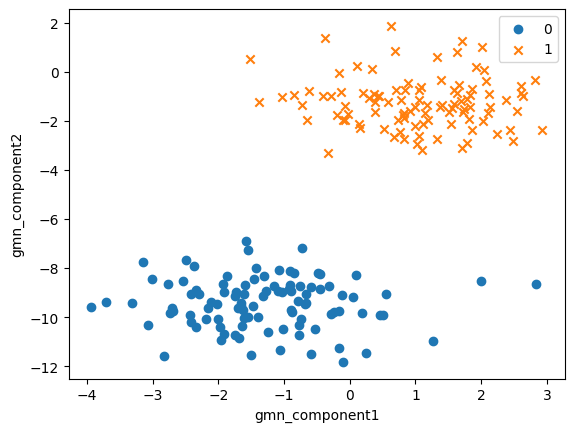

In [52]:
# 가우시안 혼합 모형을 이용한 데이터 플랏
# DBcan을 이용한 데이터 플랏
df = X_gmn_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmn']==i]
    target_i = i
    X1 = df_i['gmn_comp1']
    X2 = df_i['gmn_comp2']
    plt.scatter(X1, X2, 
                marker=mark,
                label=target_i)
    
plt.xlabel('gmn_component1')
plt.ylabel('gmn_component2')
plt.legend()
plt.show()

In [53]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_gmn)
print(sil_score)

0.7842908753561848
